<a href="https://colab.research.google.com/github/Suchitra-V31/Deep_Learning_Projects/blob/main/Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIFAR-10** is a very popular computer vision dataset. This dataset is well studied in many types of deep learning research for object recognition.

This dataset consists of **60,000 images** divided into **10 target classes**, with each category containing **6000 images of shape 32*32**. This dataset contains images of low resolution (32*32), which allows researchers to try new algorithms. The 10 different classes of this dataset are:

1.Airplane
2.Car
3.Bird
4.Cat
5.Deer
6.Dog
7.Frog
8.Horse
9.Ship
10.Truck



CIFAR-10 dataset is already available in the datasets module of Keras. We do not need to download it; we can directly import it from keras.datasets.

#Let us import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical



#Get the data

In [4]:
from keras.datasets import cifar10

In [5]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

#Let us visualize the images

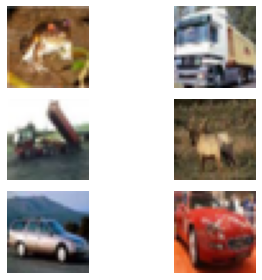

In [6]:
for i in range(6):
  plt.subplot(3,2,i+1)
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [8]:
X_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

#Convert the images into data

In [14]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [15]:
X_train/=255
X_test/=255

In [16]:
n_classes=10
y_train=to_categorical(y_train,n_classes)
y_test=to_categorical(y_test,n_classes)

#Build our Model

In [42]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 8, 8, 128)       

#Compile Model

In [44]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
final_model=model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
1563/1563 [==============================] - 366s 233ms/step - loss: 1.4267 - accuracy: 0.4851 - val_loss: 1.1592 - val_accuracy: 0.5980
Epoch 2/15
1563/1563 [==============================] - 381s 244ms/step - loss: 1.0635 - accuracy: 0.6268 - val_loss: 0.9633 - val_accuracy: 0.6618
Epoch 3/15
1563/1563 [==============================] - 379s 242ms/step - loss: 0.9351 - accuracy: 0.6733 - val_loss: 0.9285 - val_accuracy: 0.6773
Epoch 4/15
1563/1563 [==============================] - 381s 244ms/step - loss: 0.8569 - accuracy: 0.7011 - val_loss: 0.8494 - val_accuracy: 0.7097
Epoch 5/15
1563/1563 [==============================] - 381s 244ms/step - loss: 0.8027 - accuracy: 0.7195 - val_loss: 0.8590 - val_accuracy: 0.7073
Epoch 6/15
1563/1563 [==============================] - 383s 245ms/step - loss: 0.7559 - accuracy: 0.7362 - val_loss: 0.8331 - val_accuracy: 0.7157
Epoch 7/15
1563/1563 [==============================] - 385s 247ms/step - loss: 0.7128 - accuracy: 0.7516 - val_

**Our model has performed with 81% accuracy**

#Save our Model

In [52]:
model.save('image.h5')